# TP6 - Cable coaxial

## ARGUELLO Camilo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

### B. Réflexion et ondes stationnaires

Optimization terminated successfully.


<IPython.core.display.Math object>

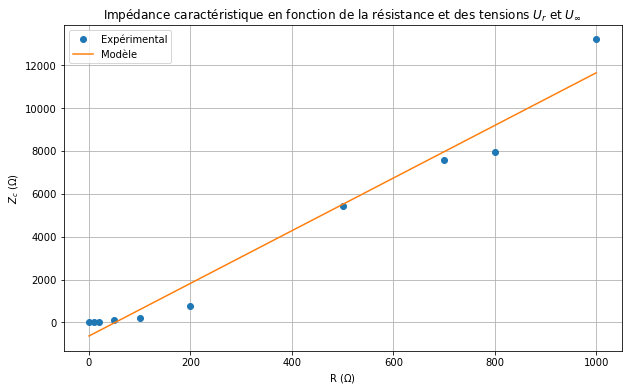

In [60]:
# Valeurs R entre 0 e 1 K
R = np.array([0, 10, 20, 50, 100, 200, 500, 700, 800, 1000]) # ohm
U_r = np.array([ -14.4, -11, -8.8, 5.2, 4.4, 8.20, 11.8, 11.8, 11.6, 12.2 ]) # V
U_inf = np.array([ 14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2 ]) # V

Z_c = R * ((U_inf - U_r) / (U_inf + U_r)) # ohm

# modele avec chi-carré
def chi_carre(params):
    a, b = params
    return np.sum(((a * R + b) - Z_c) ** 2)
  
result = minimize(chi_carre, [1, 1])
print(result.message)
a, b = result.x
display(Math(f'Z_c = {np.abs(b/a):.2f} \; \\Omega')) ## TO CHECK THIS (we should get something around 50 ohm)

# Z_c en fonction de R
plt.figure(figsize=(10, 6)) 
plt.plot(R, Z_c, 'o', label='Expérimental')
plt.plot(R, a * R + b, label='Modèle')
plt.title('Impédance caractéristique en fonction de la résistance et des tensions $U_r$ et $U_{\\infty}$')
plt.xlabel('R ($\Omega$)')
plt.ylabel('$Z_c$ ($\Omega$)')
plt.legend()
plt.grid()
plt.show()

### Résonateur

In [93]:
l = 100 # m

In [94]:
# 15 
# frequence entre 100KHz et 6MHz
v1 = np.array([500, 1400, 2400, 3400, 4400, 5500]) * 1e3 # Hz
v_p_ouv = np.array([ 502, 1400, 2400, 3400, 4400, 5400]) * 1e3 # Hz

In [95]:
# 16
v2 = np.array([900, 1900, 2800, 3800, 4800, 5800]) * 1e3 # Hz
v_p_cc = np.array([ 900, 1900, 2800, 3800, 4800, 5800 ]) * 1e3 # Hz

<IPython.core.display.Math object>

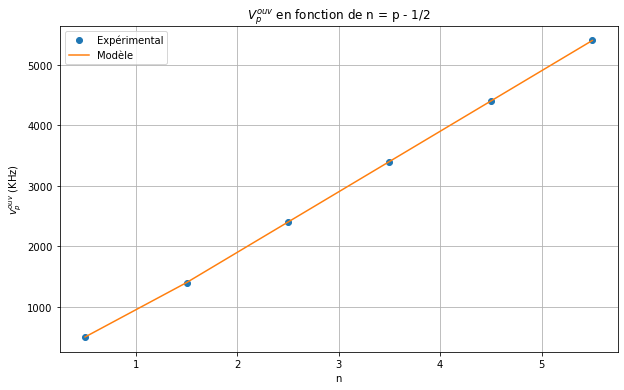

In [105]:
# 17
# n = p - 1/2 avec p \belong N
# v_p_ouv = n * (c / 2 * l')

# Trouver c en ajustant les données
def f(x, c, l):
    return x * (c / (2 * l))

n = np.arange(1, 7) - 1/2
c = 2 * l * v_p_ouv / n

display(Math(f'c = {c.mean():.2e} \; m/s'))

# v_p_ouv en fonction de n = p/2
plt.figure(figsize=(10, 6))
plt.plot(n, v_p_ouv / 1e3, 'o', label='Expérimental')
plt.plot(n, f(n, c, l) / 1e3, label='Modèle')
plt.title('$V_p^{ouv}$ en fonction de n = p - 1/2')
plt.xlabel('n')
plt.ylabel('$v_p^{ouv}$ (KHz)')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Math object>

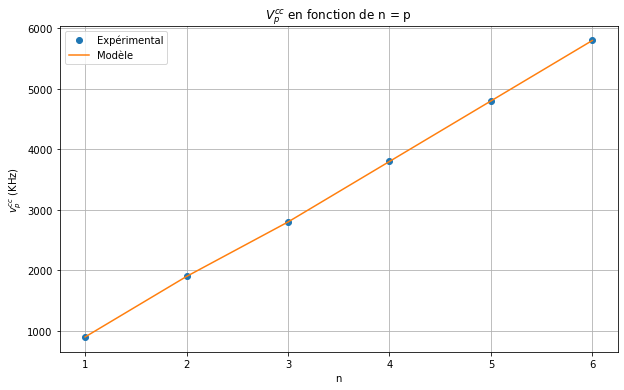

In [106]:
# n = p avec p \belong N
# v_p_cc = n * (c / 2 * l')

# Trouver c en ajustant les données
def f(x, c, l):
    return x * (c / (2 * l))

n = np.arange(1, 7)
c = 2 * l * v_p_cc / n

display(Math(f'c = {c.mean():.2e} \; m/s'))

# v_p_ouv en fonction de n = p/2
plt.figure(figsize=(10, 6))
plt.plot(n, v_p_cc / 1e3, 'o', label='Expérimental')
plt.plot(n, f(n, c, l) / 1e3, label='Modèle')
plt.title('$V_p^{cc}$ en fonction de n = p')
plt.xlabel('n')
plt.ylabel('$v_p^{cc}$ (KHz)')
plt.grid()
plt.legend()
plt.show()